Olá, 

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
    
<span class="text-danger">Porém, há espaço para melhorias: </span>
 * <span class="text-danger"> ajustar cálculo acumulado, ajustar exibição de ICE e RICE </span>

Confesso que me parece não usual apresentar a etapa EDA após os testes. Recomendo fortemente inverter, pois é o esperado no mercado.

Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho. 


</div>



<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    Corrigi as demonstrações de ICE e RICE, mas não entendi o que você disse sobre os dados acumulados.
    nossos códigos estão iguais, se você estiver se referindo à tarefa numero 4 e 5, eu pessoalmente interpretei como sendo não-cumulativo, mas de qualquer forma, atualizei os gráficos para mostrar os valores cumulativos.
</div>


<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora. Passei um tempo investigando o que houve: como você inverteu a ordem, o dataset mudou logo os gráficos ficaram diferentes. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# Pré análise:

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

def rectifycolnames(df): # função para corrigir nomes de colunas
    new_col_names = []
    for col in df.columns:
        name_strip = col.strip()
        name_lower = name_strip.lower()
        name_no_space = name_lower.replace(' ', '_')
        new_col_names.append(name_no_space)
    return new_col_names

df_hypotheses = pd.read_csv('./datasets/hypotheses_us.csv', sep = ';')
df_hypotheses.columns = rectifycolnames(df_hypotheses)

orders = pd.read_csv('./datasets/orders_us.csv')
orders.columns = rectifycolnames(orders)
orders['transactionid'] = orders['transactionid'].astype('object')
orders['visitorid'] = orders['visitorid'].astype('object')
orders['date'] = orders['date'].astype('datetime64[ns]')

visitors = pd.read_csv('./datasets/visits_us.csv')
visitors.columns = rectifycolnames(visitors)
visitors['date'] = visitors['date'].astype('datetime64[ns]')

# Parte 1

In [2]:
ICE = (df_hypotheses['impact'] 
       * df_hypotheses['confidence']
      ) / df_hypotheses['effort']# escreva seu código aqui

df_hypotheses['ICE'] = ICE



RICE = (df_hypotheses['reach'] 
        * df_hypotheses['impact'] 
        * df_hypotheses['confidence']
       ) / df_hypotheses['effort']# escreva seu código aqui

df_hypotheses['RICE'] = RICE

top_ICE = df_hypotheses.sort_values('ICE', ascending = False)
top_RICE = df_hypotheses.sort_values('RICE', ascending = False)

print(f"ICE de hipóteses:\n{df_hypotheses[['hypothesis', 'ICE']].sort_values('ICE', ascending = False)}\n")
print(f"RICE de hipóteses:\n{df_hypotheses[['hypothesis', 'RICE']].sort_values('RICE', ascending = False)}\n")
print('Melhores valores:\nTop ICE: {0}\nHypothese: {1}\nTop RICE: {2}\nHypothese: {3}'.format(
    top_ICE['ICE'].iloc[0],
    top_ICE['hypothesis'].iloc[0],
    top_RICE['RICE'].iloc[0],
    top_RICE['hypothesis'].iloc[0],
))

ICE de hipóteses:
                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

RICE de hipóteses:
                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion 


<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1: </b> <a class="tocSkip"></a>

- me parece confuso. oriento exibir separadamente em ordem decresente

</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Ficou ótimo. Assim, podemos ver de forma separada
</div>

Essa alteração nos valores se dá à valorização de Reach(alcance) da hipótese 7, que é o maior.

a hipótese 8 pode parecer mais impactante e lucrativa, enquanto mantendo um esforço baixo, mas só alcançará aqueles usuários que comemoram o aniversário no dia especifico do teste.

já a hipotese 7 contempla todos os usuários que utilizarem o site.

# Removendo outliers

435.54


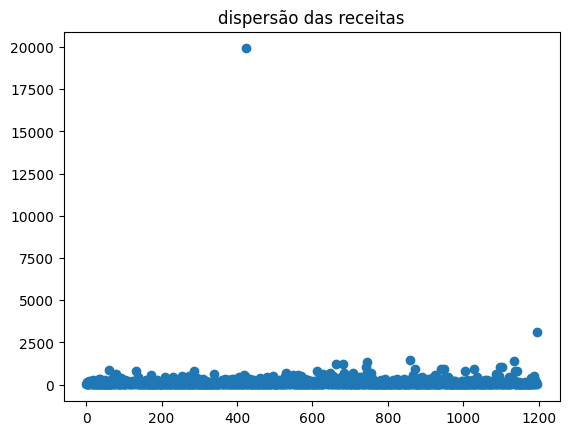

In [2]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

x_values = pd.Series(range(0,len(orders['revenue'])))

High_orders = np.percentile(orders['revenue'], [95, 99]) # tarefa nº 8
print(High_orders[0])

plt.scatter(x_values, orders['revenue'])
plt.title('dispersão das receitas')
plt.show()

2.0
2.0


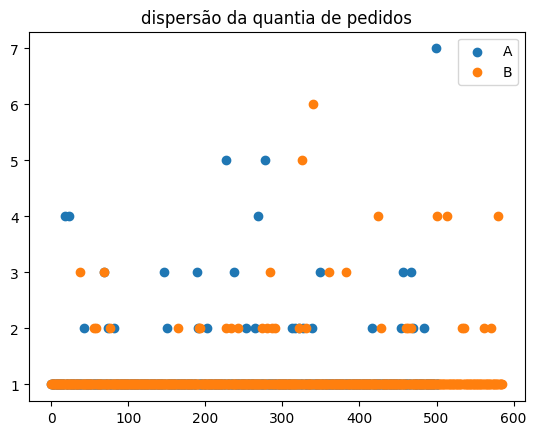

In [3]:
x_values = pd.Series(range(0,len(ordersByUsersA['orders'])))

A_many_orders = np.percentile(ordersByUsersA['orders'], [95, 99]) # tarefa nº 6
B_many_orders = np.percentile(ordersByUsersB['orders'], [95, 99])

print(A_many_orders[0])
print(B_many_orders[0])

plt.scatter(x_values, ordersByUsersA['orders'], label='A')

x_values = pd.Series(range(0,len(ordersByUsersB['orders'])))
plt.scatter(x_values, ordersByUsersB['orders'], label='B')
plt.title('dispersão da quantia de pedidos')
plt.legend()
plt.show()

In [5]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'], # definindo o percentil 95 como anomalo
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 435.54]['visitorid'] # definindo o percentil 95 como anomalo

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [6]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Pre_Relevance = stats.mannwhitneyu(sampleA, sampleB)[1].round(3)
Pre_A_gain = (sampleA.mean() / sampleB.mean() - 1).round(3)
Pre_B_gain = (sampleB.mean()/sampleA.mean()-1).round(3)


In [7]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Post_Relevance = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1].round(3)
Post_A_gain = (sampleAFiltered.mean() / sampleBFiltered.mean() - 1).round(3)
Post_B_gain = (sampleBFiltered.mean() / sampleAFiltered.mean() - 1).round(3)

In [8]:
print(f'Significância estatística do numero de compras antes do filtro: {Pre_Relevance}')
print(f'Ganho relativo do grupo A: {Pre_A_gain}\nGanho relativo do grupo B: {Pre_B_gain}')
print(f'Significância estatística do numero de compras após o filtro: {Post_Relevance}')
print(f'Ganho relativo do grupo A: {Post_A_gain}\nGanho relativo do grupo B: {Post_B_gain}')
print(f'Diferenças:\n\u03B1: {(Post_Relevance - Pre_Relevance).round(4)}\nGanho A: {(Post_A_gain - Pre_A_gain).round(4)}\nGanho B: {(Post_B_gain - Pre_B_gain).round(4)}')

Significância estatística do numero de compras antes do filtro: 0.017
Ganho relativo do grupo A: -0.121
Ganho relativo do grupo B: 0.138
Significância estatística do numero de compras após o filtro: 0.013
Ganho relativo do grupo A: -0.147
Ganho relativo do grupo B: 0.173
Diferenças:
α: -0.004
Ganho A: -0.026
Ganho B: 0.035


Retificação na quantidade de pedidos por usuário mudou pouco os dados.

In [9]:
sample_rev_A = orders[orders['group']=='A']['revenue']
sample_rev_B =  orders[orders['group']=='B']['revenue']

Pre_Rev_Relevance = stats.mannwhitneyu(sample_rev_A, sample_rev_B)[1].round(3)
Pre_A_Rev_gain = (sample_rev_A.mean() / sample_rev_B.mean() - 1).round(3)
Pre_B_Rev_gain = (sample_rev_B.mean()/sample_rev_A.mean()-1).round(3)

In [10]:
Post_Rev_Relevance = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1].round(3)

Post_A_Rev_gain = (orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1).round(3)

Post_B_Rev_gain = (orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1).round(3)

In [11]:
print(f'Significância estatística da receita média antes do filtro: {Pre_Rev_Relevance}')
print(f'Ganho relativo do grupo A: {Pre_A_Rev_gain}\nGanho relativo do grupo B: {Pre_B_Rev_gain}')
print(f'Significância estatística da receita média após o filtro: {Post_Rev_Relevance}')
print(f'Ganho relativo do grupo A: {Post_A_Rev_gain}\nGanho relativo do grupo B: {Post_B_Rev_gain}')
print(f'Diferenças:\n\u03B1: {(Post_Rev_Relevance - Pre_Rev_Relevance).round(4)}\nGanho A: {(Post_A_Rev_gain - Pre_A_Rev_gain).round(4)}\nGanho B: {(Post_B_Rev_gain - Pre_B_Rev_gain).round(4)}')

Significância estatística da receita média antes do filtro: 0.692
Ganho relativo do grupo A: -0.201
Ganho relativo do grupo B: 0.252
Significância estatística da receita média após o filtro: 0.788
Ganho relativo do grupo A: 0.02
Ganho relativo do grupo B: -0.019
Diferenças:
α: 0.096
Ganho A: 0.221
Ganho B: -0.271


Retificação na receita média por usuário mudou muito os dados. (outlier grande)

In [12]:
orders = orders[~orders['visitorid'].isin(abnormalUsers)]

# Parte 2

In [2]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': pd.Series.nunique,
            'visitorid': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData.head(5))

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


Criei o conjunto de dados acumulados para o cálculo da conversão diária acumulada e receita acumulada.

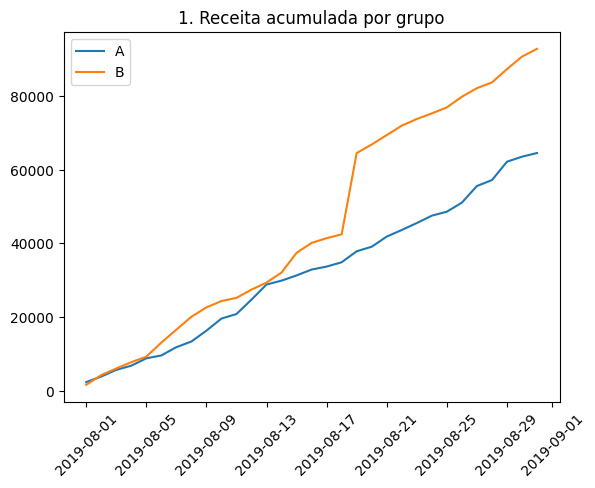

In [3]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('1. Receita acumulada por grupo')
plt.legend()
plt.show()


<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1: </b> <a class="tocSkip"></a>

Precisa plotar a dados acumulados. Vou deixar código abaixo. Com base neste código, você vai ajustar os outros gráficos

</div>


In [4]:
# datesGroups = orders[['date','group']].drop_duplicates()

# ordersAggregated = datesGroups.apply(
# lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
#     'date' : 'max',
#     'group' : 'max',
#     'transactionId' : pd.Series.nunique,
#     'visitorId' : pd.Series.nunique,
#     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# visitorsAggregated = datesGroups.apply(
# lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
# 'date' : 'max',
# 'group' : 'max',
# 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# print(cumulativeData.head(5))

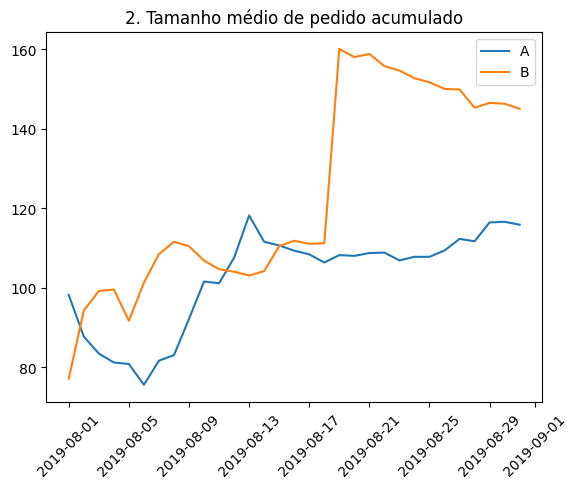

In [5]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('2. Tamanho médio de pedido acumulado')
plt.legend()
plt.show()

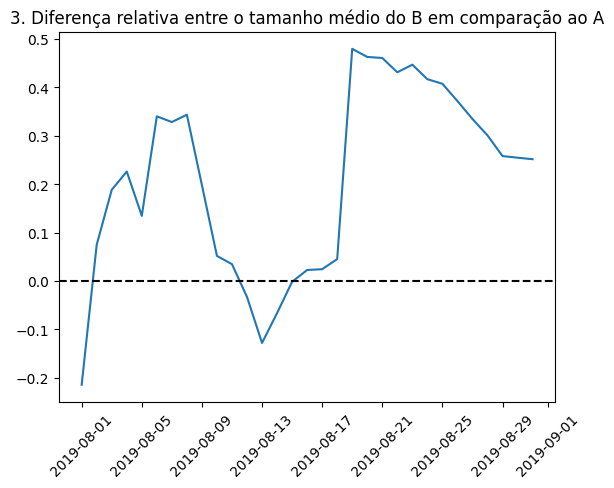

In [6]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('3. Diferença relativa entre o tamanho médio do B em comparação ao A')
plt.show()

In [7]:
ordersAggregated_noncum = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] == x['date'], orders['group'] == x['group']
        )
        ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': pd.Series.nunique,
            'visitorid': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).drop_duplicates().sort_values(['date', 'group'])


visitorsAggregated_noncum = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] == x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {'date': 'max',
         'group': 'max',
         'visits': 'sum'}
    ),
    axis=1,
).drop_duplicates().sort_values(['date', 'group'])

Agg_Data = ordersAggregated_noncum.merge(
    visitorsAggregated_noncum, left_on=['date', 'group'], right_on=['date', 'group']
)
Agg_Data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
Agg_DataA = Agg_Data[Agg_Data['group'] == 'A'][
    ['date', 'visitors', 'orders']]
Agg_DataB = Agg_Data[Agg_Data['group'] == 'B'][
    ['date', 'visitors', 'orders']]

Criei o conjunto de dados não acumulados para o cálculo da conversão diária

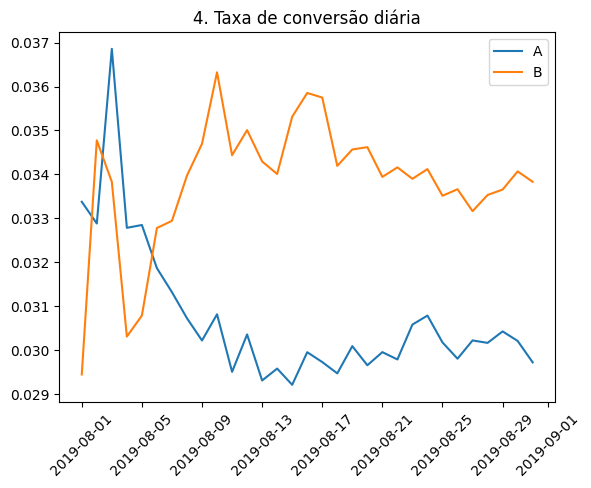

In [8]:
cumulativeAccessA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'visitors', 'orders']]
cumulativeAccessB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'visitors', 'orders']]

plt.plot(cumulativeAccessA['date'], cumulativeAccessA['orders']/cumulativeAccessA['visitors'], label='A')
plt.plot(cumulativeAccessB['date'], cumulativeAccessB['orders']/cumulativeAccessB['visitors'], label='B')
plt.xticks(rotation=45)
plt.title('4. Taxa de conversão diária')
plt.legend()
plt.show()


Não é possivel fazer observações com este gráfico, devo utilizar o gráfico da taxa de conversão acumulada.

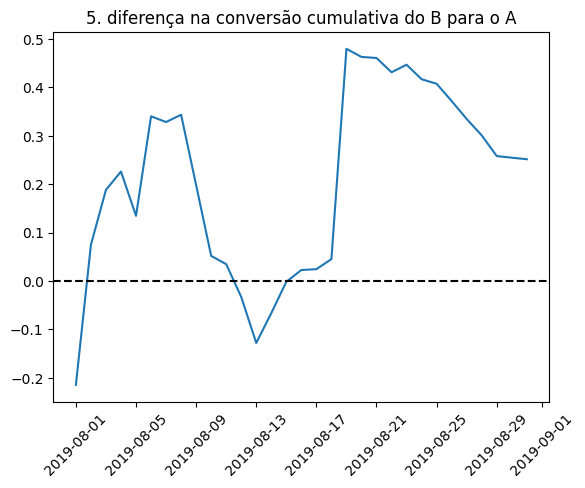

In [9]:

mergedCumulativeAccess = cumulativeAccessA.merge(cumulativeAccessB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('5. diferença na conversão cumulativa do B para o A')
plt.show()


B tem margem de aprox. 0.3% na taxa de conversão

Conclusão: devemos continuar o teste, pois o grupo B teve melhor performance na taxa de conversão, mas ainda não é possivel concluir se o tamanho do pedido será maior, menor ou igual ao do A. portanto devemos continuar testando por mais uma ou duas semanas para nos assegurarmos da performance.